In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
from sklearn import svm
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.svm import SVC
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import time
import bovo.svm as bsvm



In [3]:
cv = KFold(n_splits=4)
svc = SVC(kernel="linear", C=1e-2)

In [5]:
def prediction_evaluation (target_name, loss_threshold_percent=None, loss_threshold=None):
    if loss_threshold_percent is not None:
        X, y, columns = bsvm.load_with_threshold(target_name, loss_threshold_percent/100)
        scores, columns_selectors = bsvm.select_features (svc, cv, X, y)
        best_variables = list(columns[columns_selectors[np.argmax(scores)]])
        print("Best variables ({}) : {}".format(len(best_variables), best_variables))

        sub_x = X.T[columns_selectors[np.argmax(scores)]].T
        accuracy, std = bsvm.calc_confusion_matrix(svc, cv, "{}%".format(loss_threshold_percent), sub_x, y)
        base_accuracy = max(np.mean(y), 1-np.mean(y))
        plt.title("Confusion Matrix for {} | Base accuracy = {:.2f} | Actual accuracy = {:.2f}(±{:.4f})".format(target_name, base_accuracy, accuracy, std))
        plt.savefig("/home/oscar/bovo/results/imgs/svm/{}_{}.png".format(target_name, loss_threshold_percent))

    if loss_threshold is not None:
        X, y, columns = bsvm.load_with_threshold(target_name, loss_threshold)
        scores, columns_selectors = bsvm.select_features (svc, cv, X, y)
        best_variables = list(columns[columns_selectors[np.argmax(scores)]])
        print("Best variables ({}) : {}".format(len(best_variables), best_variables))

        sub_x = X.T[columns_selectors[np.argmax(scores)]].T
        accuracy, std = bsvm.calc_confusion_matrix(svc, cv, "{:.2f}".format(loss_threshold), sub_x, y)
        base_accuracy = max(np.mean(y), 1-np.mean(y))
        plt.title("Confusion Matrix for {} | Base accuracy = {:.2f} | Actual accuracy = {:.2f}(±{:.4f})".format(target_name, base_accuracy, accuracy, std))
        plt.savefig("/home/oscar/bovo/results/imgs/svm/{}_{:.2f}.png".format(target_name, loss_threshold))

    plt.show()


Best variables (13) : ['Airesecteur1', 'Airesecteur2', 'Airesecteur4', 'Airesecteur5', 'Airesecteur6', 'Airesecteur7', 'Airesecteur8', 'SEpCo75', 'SEpCoM', 'SEpTrM', 'BC', 'MC', 'MB']


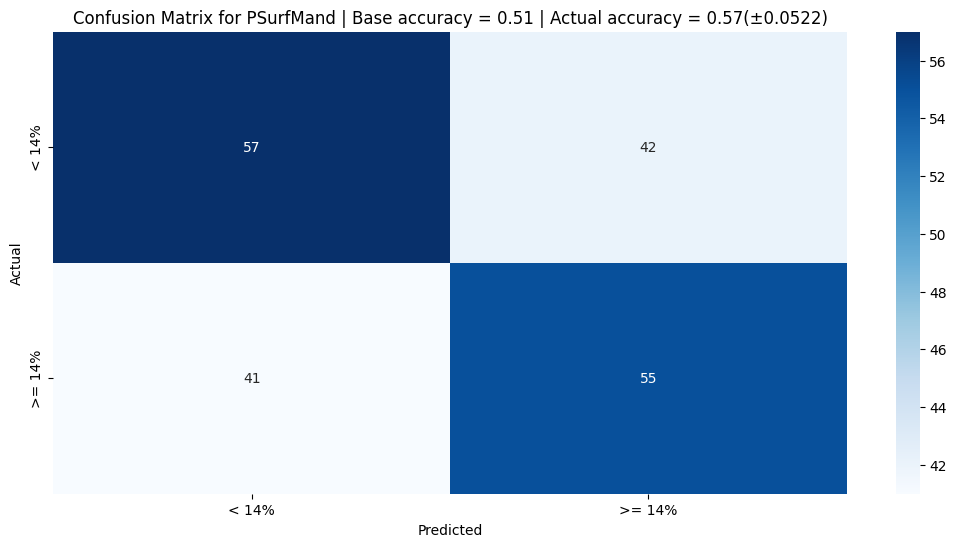

Best variables (1) : ['Airesecteur3']


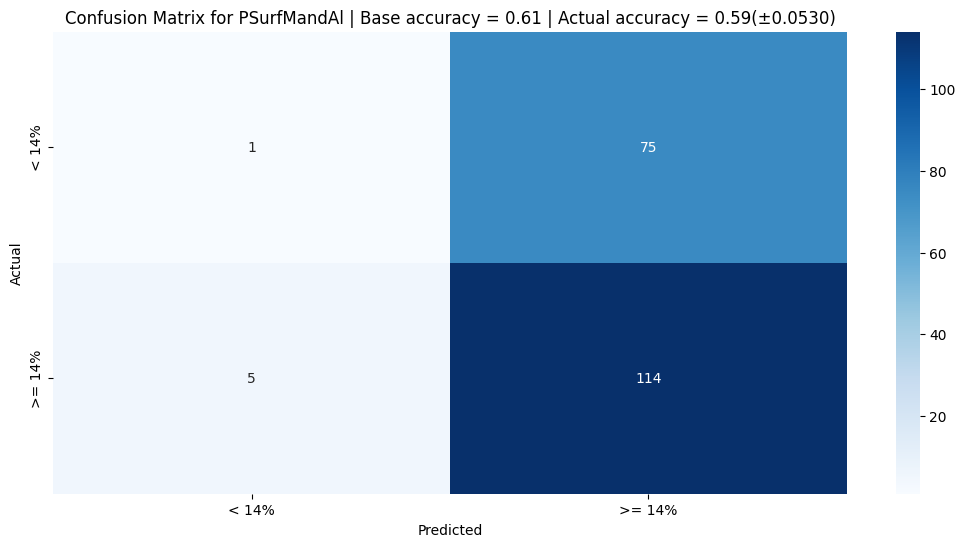

Best variables (6) : ['Airesecteur3', 'Airesecteur5', 'Airesecteur7', 'Airesecteur8', 'SEpCoM', 'SEpCo2mmC']


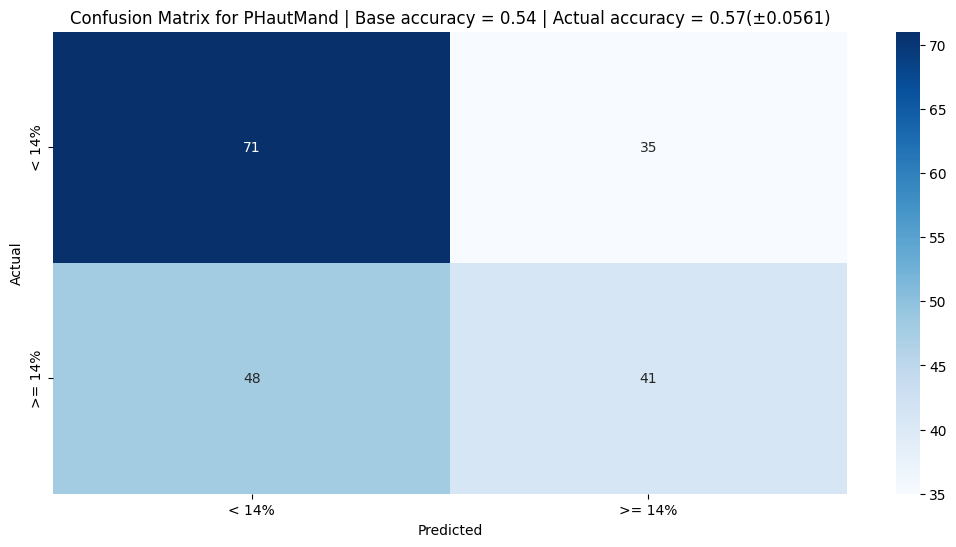

Best variables (28) : ['Airesecteur2', 'Airesecteur5', 'Airesecteur7', 'SEpCo25', 'SEpCo50', 'SEpCo75', 'SEpCoM', 'SEpCo2mmC', 'SEpTr25', 'SEpTr50', 'SEpTr75', 'SEpTrM', 'BC', 'MC', 'MB', 'SLaTaOs25', 'SLaTaOs50', 'SLaTaOs75', 'SLaTaOsTangM', 'SPeBaTr', 'SPeToCoAl', 'SPeCoBas', 'SPeMaBas', 'SPeToCo', 'SPeToTr', 'SPeToTrAl', 'SSuCoBa', 'SSuTrPaBas']


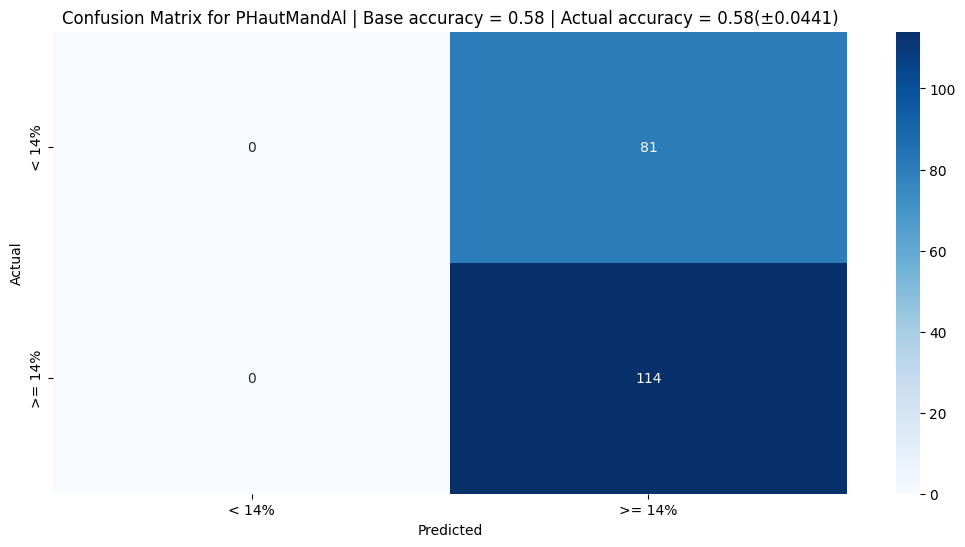

In [6]:
prediction_evaluation ("PSurfMand", loss_threshold_percent=14)
prediction_evaluation ("PSurfMandAl", loss_threshold_percent=14)
prediction_evaluation ("PHautMand", loss_threshold_percent=14)
prediction_evaluation ("PHautMandAl", loss_threshold_percent=14)


Best variables (42) : ['Airesecteur1', 'Airesecteur2', 'Airesecteur3', 'Airesecteur4', 'Airesecteur5', 'Airesecteur6', 'Airesecteur7', 'Airesecteur8', 'SEpCo25', 'SEpCo50', 'SEpCo75', 'SEpCoM', 'SEpCo2mmC', 'SEpTr25', 'SEpTr50', 'SEpTr75', 'SEpTrM', 'BC', 'MC', 'MB', 'SLaTaOs2mmC', 'SLaTaOs25', 'SLaTaOs50', 'SLaTaOs75', 'SLaTaOsTangM', 'SPeBaTr', 'SPeToCoAl', 'SPeCoBas', 'SPeMaBas', 'SPeToCo', 'SPeToMa', 'SPeToTr', 'SPeToTrAl', 'SSuToCoAl', 'SSuCoBa', 'SSuMaPaAl', 'SSuMaPaBas', 'SSuToCo', 'SSuToMa', 'SSuToTr', 'SSuToTrPaAl', 'SSuTrPaBas']


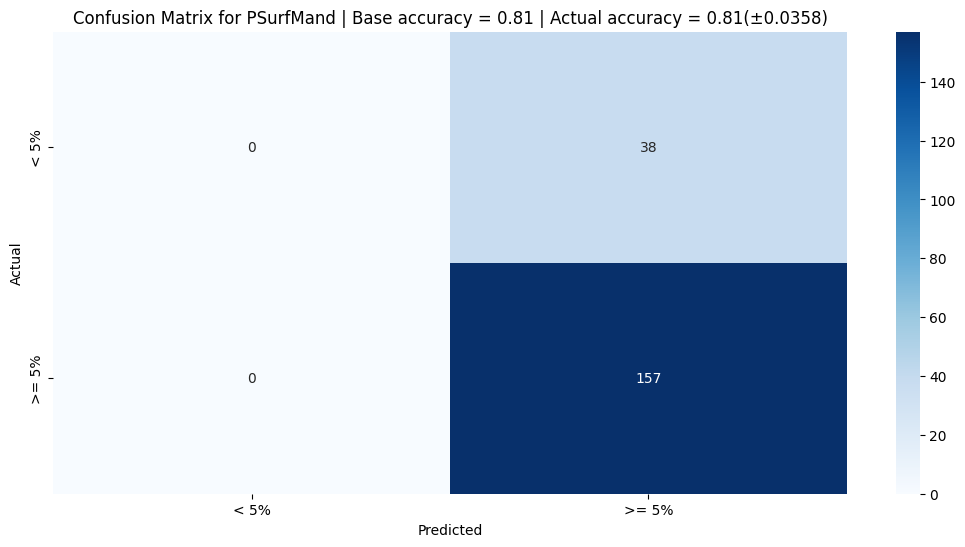

Best variables (42) : ['Airesecteur1', 'Airesecteur2', 'Airesecteur3', 'Airesecteur4', 'Airesecteur5', 'Airesecteur6', 'Airesecteur7', 'Airesecteur8', 'SEpCo25', 'SEpCo50', 'SEpCo75', 'SEpCoM', 'SEpCo2mmC', 'SEpTr25', 'SEpTr50', 'SEpTr75', 'SEpTrM', 'BC', 'MC', 'MB', 'SLaTaOs2mmC', 'SLaTaOs25', 'SLaTaOs50', 'SLaTaOs75', 'SLaTaOsTangM', 'SPeBaTr', 'SPeToCoAl', 'SPeCoBas', 'SPeMaBas', 'SPeToCo', 'SPeToMa', 'SPeToTr', 'SPeToTrAl', 'SSuToCoAl', 'SSuCoBa', 'SSuMaPaAl', 'SSuMaPaBas', 'SSuToCo', 'SSuToMa', 'SSuToTr', 'SSuToTrPaAl', 'SSuTrPaBas']


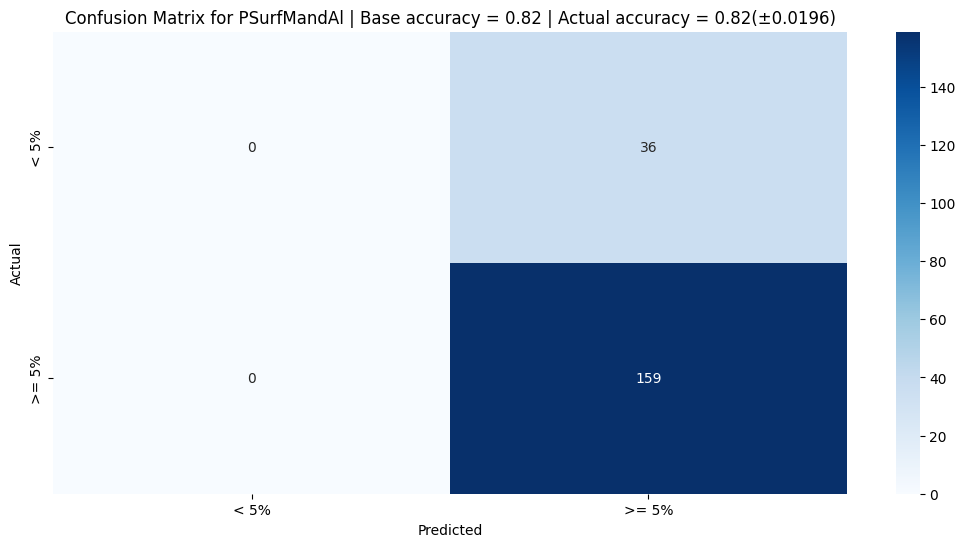

Best variables (42) : ['Airesecteur1', 'Airesecteur2', 'Airesecteur3', 'Airesecteur4', 'Airesecteur5', 'Airesecteur6', 'Airesecteur7', 'Airesecteur8', 'SEpCo25', 'SEpCo50', 'SEpCo75', 'SEpCoM', 'SEpCo2mmC', 'SEpTr25', 'SEpTr50', 'SEpTr75', 'SEpTrM', 'BC', 'MC', 'MB', 'SLaTaOs2mmC', 'SLaTaOs25', 'SLaTaOs50', 'SLaTaOs75', 'SLaTaOsTangM', 'SPeBaTr', 'SPeToCoAl', 'SPeCoBas', 'SPeMaBas', 'SPeToCo', 'SPeToMa', 'SPeToTr', 'SPeToTrAl', 'SSuToCoAl', 'SSuCoBa', 'SSuMaPaAl', 'SSuMaPaBas', 'SSuToCo', 'SSuToMa', 'SSuToTr', 'SSuToTrPaAl', 'SSuTrPaBas']


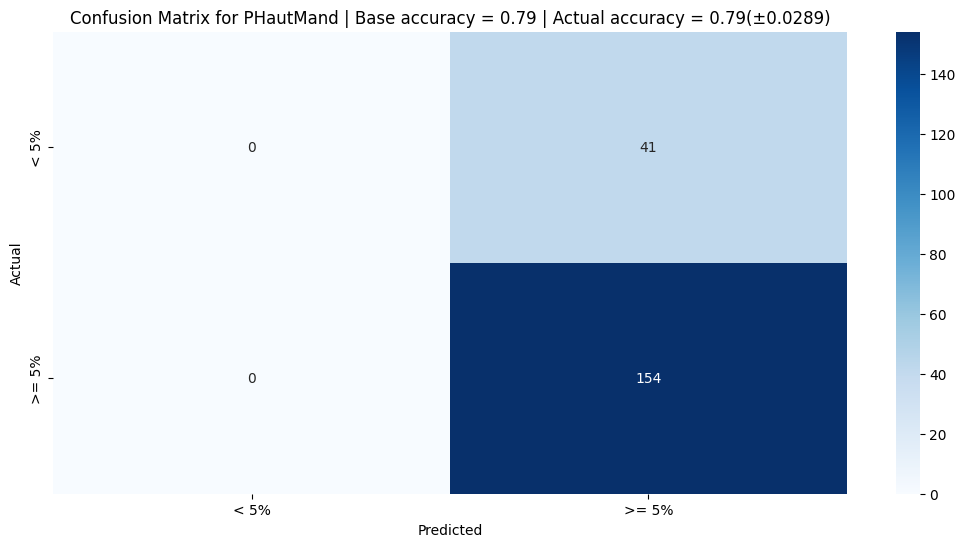

Best variables (42) : ['Airesecteur1', 'Airesecteur2', 'Airesecteur3', 'Airesecteur4', 'Airesecteur5', 'Airesecteur6', 'Airesecteur7', 'Airesecteur8', 'SEpCo25', 'SEpCo50', 'SEpCo75', 'SEpCoM', 'SEpCo2mmC', 'SEpTr25', 'SEpTr50', 'SEpTr75', 'SEpTrM', 'BC', 'MC', 'MB', 'SLaTaOs2mmC', 'SLaTaOs25', 'SLaTaOs50', 'SLaTaOs75', 'SLaTaOsTangM', 'SPeBaTr', 'SPeToCoAl', 'SPeCoBas', 'SPeMaBas', 'SPeToCo', 'SPeToMa', 'SPeToTr', 'SPeToTrAl', 'SSuToCoAl', 'SSuCoBa', 'SSuMaPaAl', 'SSuMaPaBas', 'SSuToCo', 'SSuToMa', 'SSuToTr', 'SSuToTrPaAl', 'SSuTrPaBas']


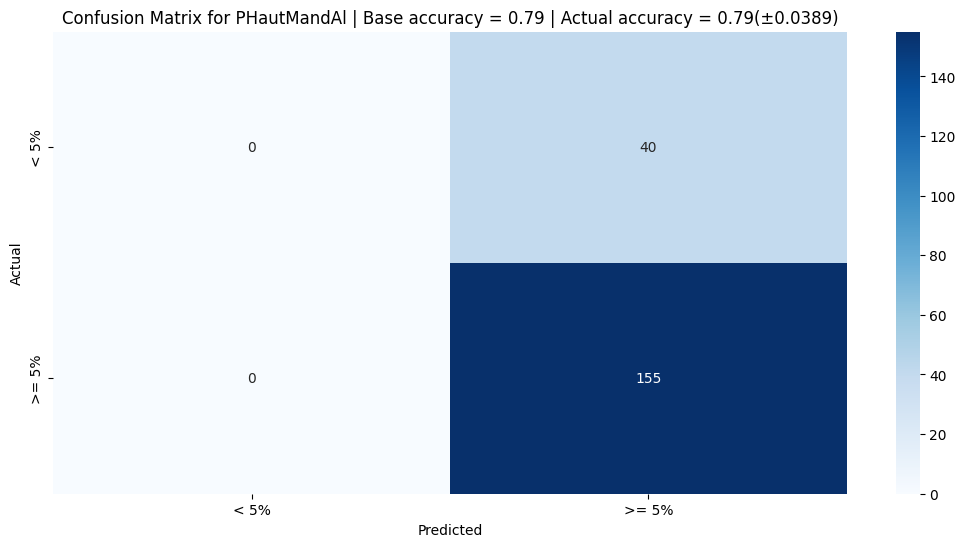

In [7]:
prediction_evaluation ("PSurfMand", loss_threshold_percent=5)
prediction_evaluation ("PSurfMandAl", loss_threshold_percent=5)
prediction_evaluation ("PHautMand", loss_threshold_percent=5)
prediction_evaluation ("PHautMandAl", loss_threshold_percent=5)


Best variables (4) : ['Airesecteur2', 'Airesecteur3', 'Airesecteur8', 'SEpCo2mmC']


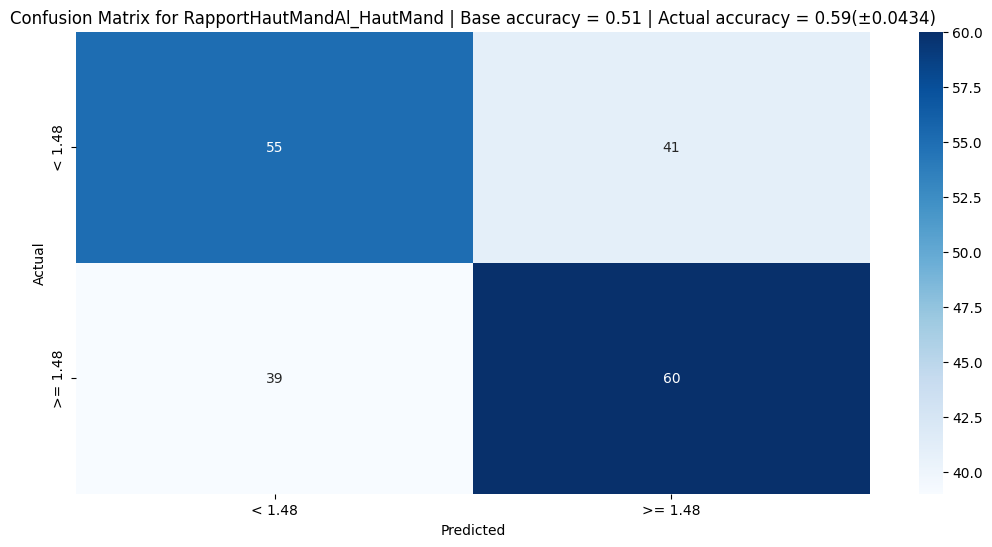

In [8]:
x, y = bsvm.load_data("RapportHautMandAl_HautMand")
prediction_evaluation ("RapportHautMandAl_HautMand", loss_threshold=np.median(y))